## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]
#boston = datasets.load_boston()
#X = pd.DataFrame(boston.data, columns = boston.feature_names)
#y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [103]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [104]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

### Verificando formato adequado para o scikitlearn

In [105]:
# Verificando se há valores nulos na base de dados
if X.isnull().sum().sum() == 0:
    print("A base de dados não contém valores nulos.")
else:
    print("A base de dados contém valores nulos.")

# Verificando se todas as colunas são numéricas
if all(X.select_dtypes(include=['number']).columns == X.columns):
    print("Todas as colunas são numéricas.")
else:
    print("Nem todas as colunas são numéricas.")

A base de dados não contém valores nulos.
Todas as colunas são numéricas.


### Matriz de correlação

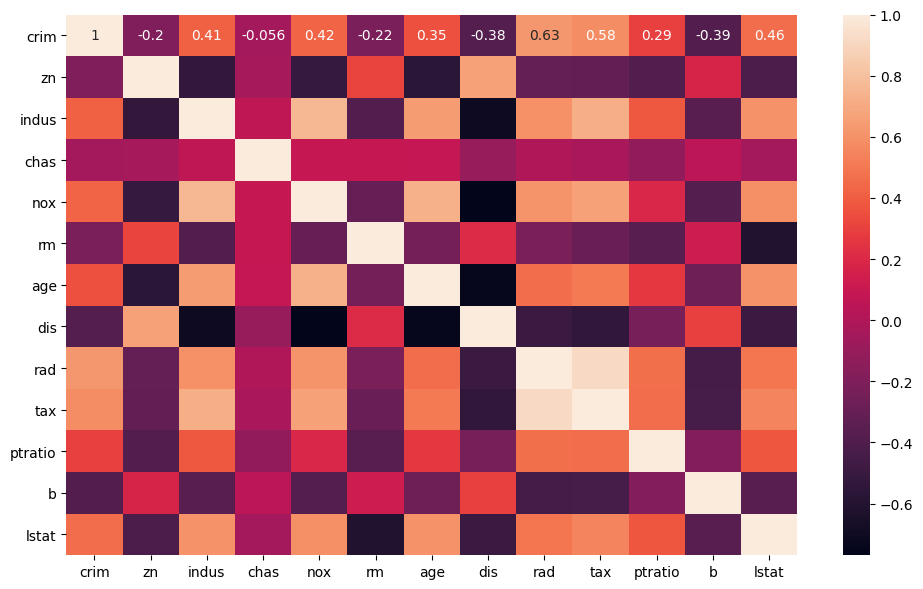

In [106]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(X.corr(), annot=True)
plt.show()

### Separe os dados em validação e teste

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Treinando duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2

In [108]:
regr_1 = DecisionTreeRegressor(max_depth=2)
#regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
#regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### Calculando o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes

In [109]:
mse1 = regr_1.score(X_train, y_train)
#mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
#print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,73


### Visualização gráfica dessa árvore

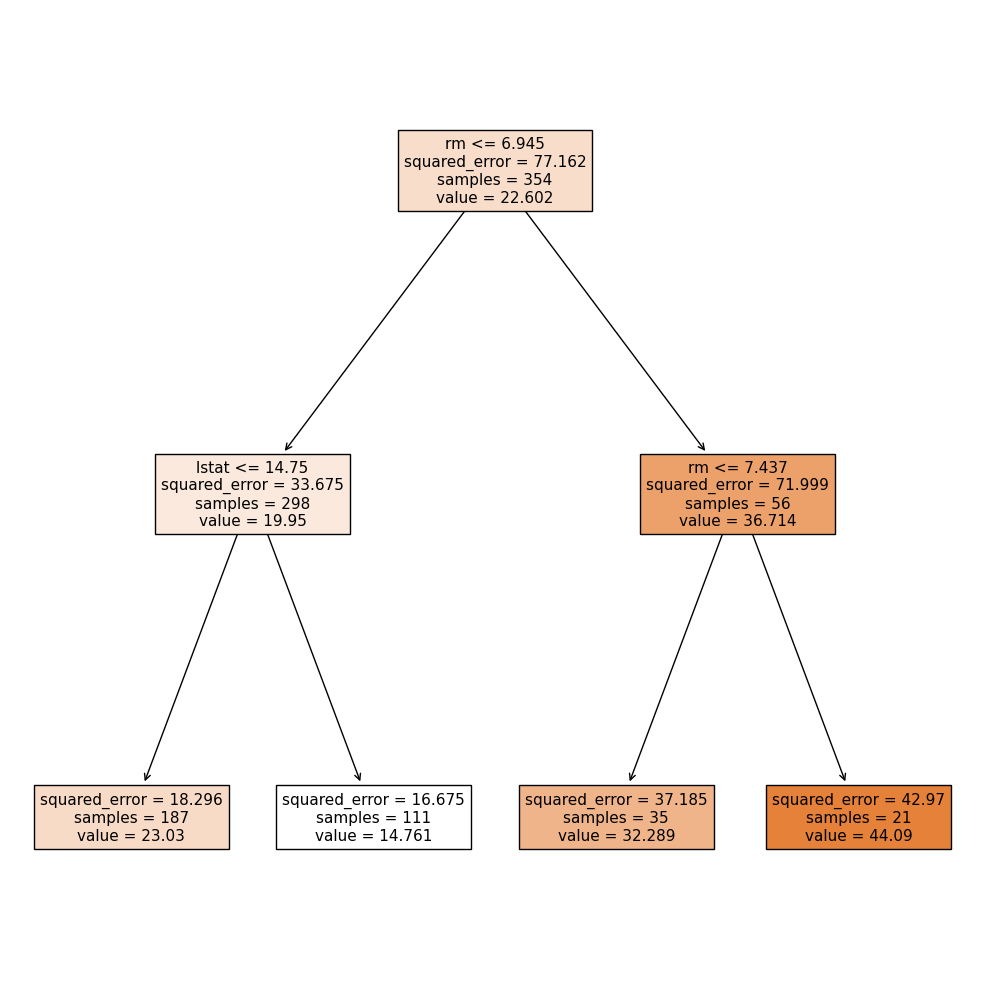

In [110]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True) 

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore

In [111]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([ 0.        ,  5.1641668 , 13.4547042 , 37.42402445]),
 'impurities': array([21.11896385, 26.28313065, 39.73783485, 77.1618593 ])}

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [112]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [113]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
#tree_depths = [clf.tree_.max_depth for clf in clfs]

In [116]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

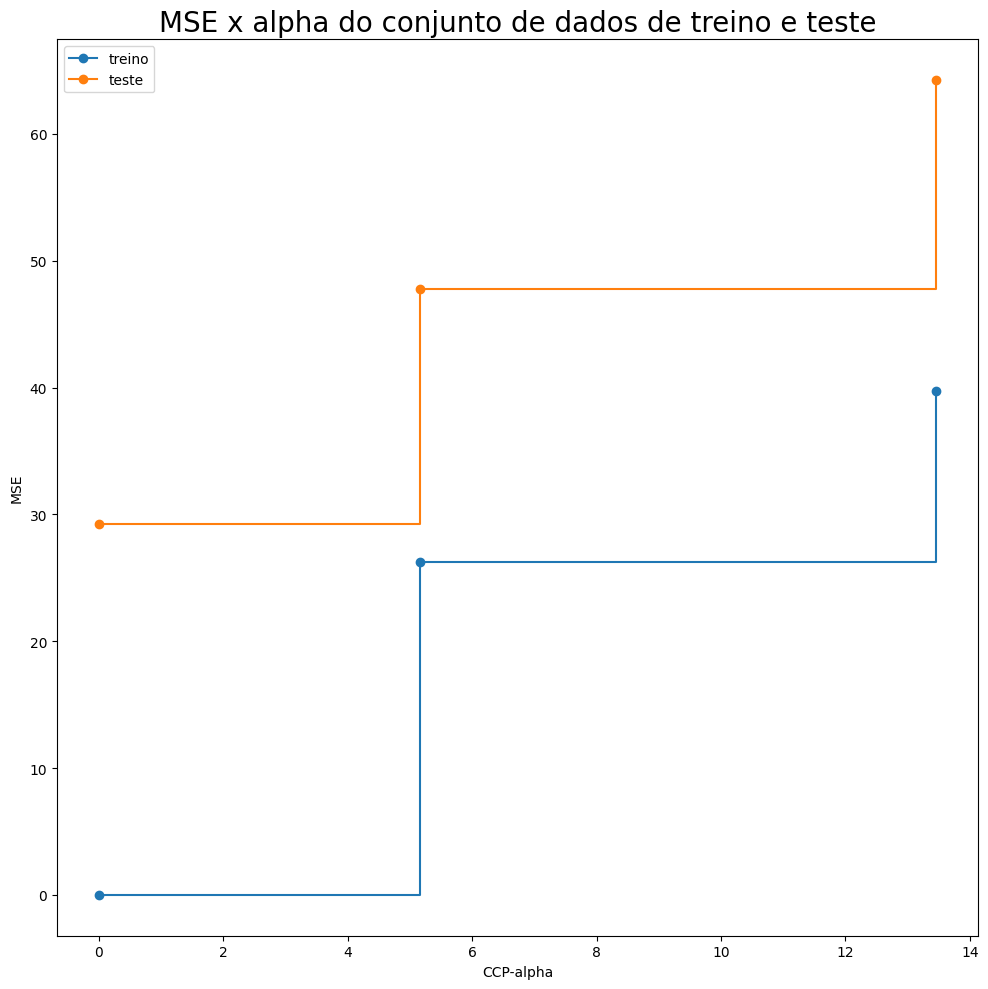

In [117]:
fig, ax = plt.subplots()
ax.set_xlabel("CCP-alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

- Melhor valor é `2`

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [118]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=2)
arvore_final.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=2, random_state=0)

In [124]:
print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'R-quadrado: na base de testes: {arvore_final.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}')

Profundidade: 3
R-quadrado: na base de testes: 0.65
MSE na base de testes: 35.44


### 7. Visualize esta árvore.

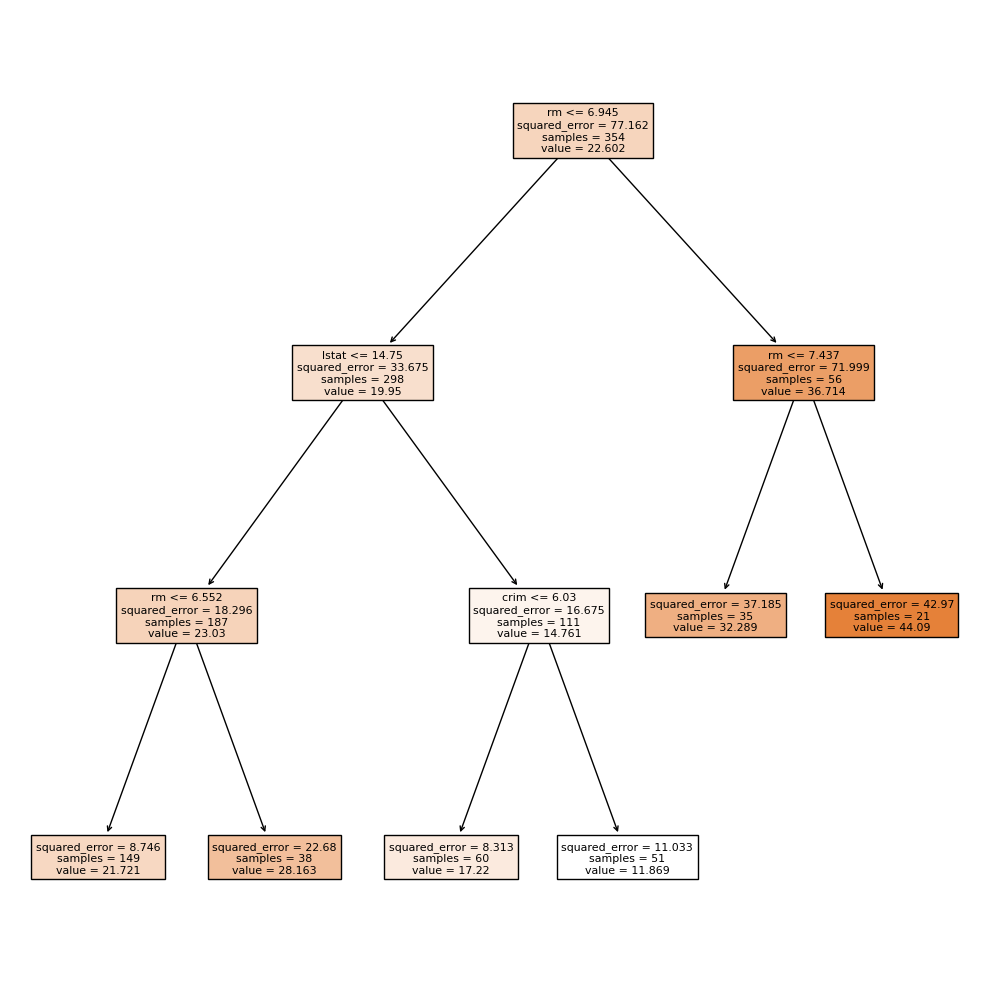

In [120]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final, 
                    feature_names=X.columns,  
                    filled=True) 

In [121]:
from sklearn.metrics import r2_score
# Criar e treinar o modelo de árvore de regressão
model = DecisionTreeRegressor()
model.fit(X, y)

# Prever os valores
y_pred = model.predict(X)

# Calcular o R-quadrado
r_squared = r2_score(y, y_pred)
print("R-quadrado:", r_squared)


R-quadrado: 1.0
